# In the land of sleep analysis
- Used the fitbit API to collect personal sleep data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime

%matplotlib inline

## Distribution of Sleep Stages

In [2]:
# import data previously collected and saved as csv
slsummaryall_df = pd.read_csv('./downloads/slsummarystagesall.csv')

In [3]:
# quick look at the dataframe
slsummaryall_df.head()

,Date,DOW,Duration,Efficiency,MainSleep,Minutes Asleep,Minutes Awake,Sleep_Deep,Sleep_Light,Sleep_REM,Sleep_stage_Wake,Sleep_stage_Wake_Count,Time in Bed
0,2018-04-15,Sunday,26820000,97,True,398,49,57,277,64,49,13,447
1,2018-04-16,Monday,33000000,97,True,464,86,71,319,74,86,23,550
2,2018-04-18,Wednesday,35040000,92,True,508,76,36,399,73,76,25,584
3,2018-04-20,Friday,30420000,95,True,433,74,31,342,60,74,33,507
4,2018-04-21,Saturday,29520000,94,True,411,81,48,309,54,81,22,492


In [82]:
slsummaryall_df['%REM'] = slsummaryall_df['Sleep_REM']/slsummaryall_df['Minutes Asleep']*100
slsummaryall_df['%Deep'] = slsummaryall_df['Sleep_Deep']/slsummaryall_df['Minutes Asleep']*100
slsummaryall_df['%Restorative'] = slsummaryall_df['%REM']+slsummaryall_df['%Deep']

In [83]:
slsummaryall_df.head()

,Date,DOW,Duration,Efficiency,MainSleep,Minutes Asleep,Minutes Awake,Sleep_Deep,Sleep_Light,Sleep_REM,Sleep_stage_Wake,Sleep_stage_Wake_Count,Time in Bed,%REM,%Deep,%Restorative
0,2018-04-15,Sunday,26820000,97,True,398,49,57,277,64,49,13,447,16.080402,14.321608,30.402010
1,2018-04-16,Monday,33000000,97,True,464,86,71,319,74,86,23,550,15.948276,15.301724,31.250000
2,2018-04-18,Wednesday,35040000,92,True,508,76,36,399,73,76,25,584,14.370079,7.086614,21.456693
3,2018-04-20,Friday,30420000,95,True,433,74,31,342,60,74,33,507,13.856813,7.159353,21.016166
4,2018-04-21,Saturday,29520000,94,True,411,81,48,309,54,81,22,492,13.138686,11.678832,24.817518


In [5]:
slsummaryall_df.dtypes

Date                      object
DOW                       object
Duration                   int64
Efficiency                 int64
MainSleep                   bool
Minutes Asleep             int64
Minutes Awake              int64
Sleep_Deep                 int64
Sleep_Light                int64
Sleep_REM                  int64
Sleep_stage_Wake           int64
Sleep_stage_Wake_Count     int64
Time in Bed                int64
dtype: object

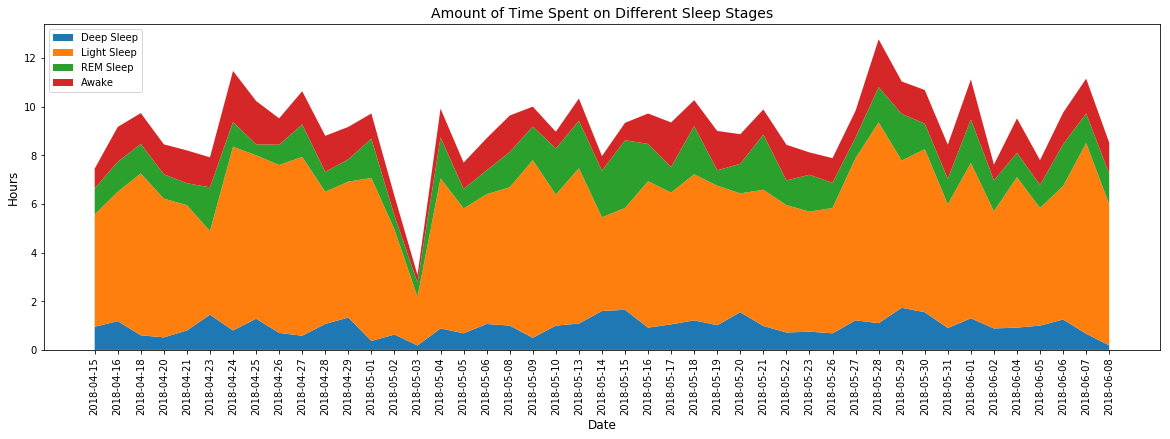

In [4]:
# plot stacked area chart for different sleep stages
x_series = slsummaryall_df['Date']
x = x_series.values
y_df = slsummaryall_df[['Sleep_Deep', 'Sleep_Light', 'Sleep_REM', 'Sleep_stage_Wake']]
y = (y_df.values.T) / 60

fig = plt.figure(figsize=(20, 6))

plt.title('Amount of Time Spent on Different Sleep Stages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hours', fontsize=12)
plt.xticks(rotation=90)

plt.stackplot(x, y, labels=['Deep Sleep', 'Light Sleep', 'REM Sleep', 'Awake'])
plt.legend(loc='upper left')
plt.show()

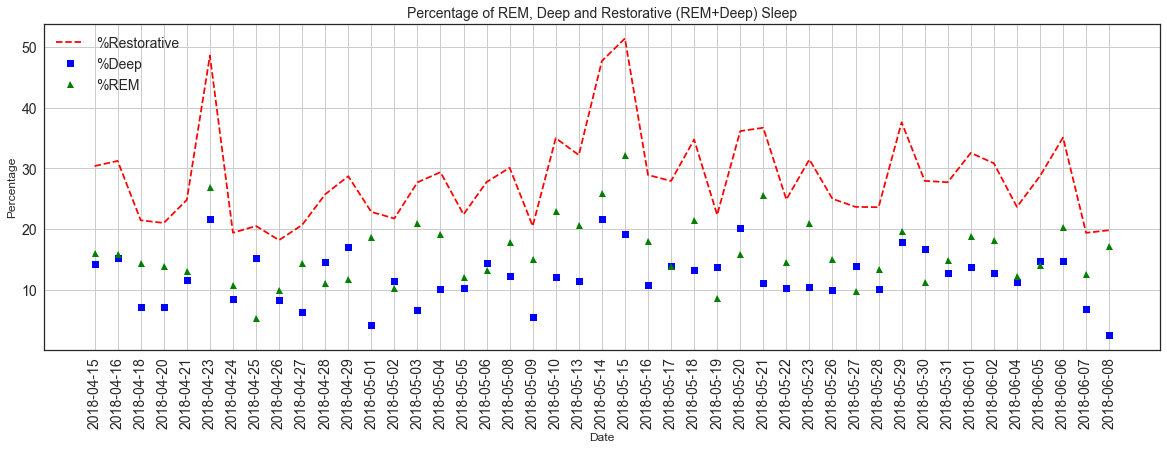

In [90]:
date_series = slsummaryall_df['Date']
perc_REM = slsummaryall_df['%REM']
perc_Deep = slsummaryall_df['%Deep']
perc_Rest = slsummaryall_df['%Restorative']

fig = plt.figure(figsize=(20, 6))
plt.plot(date_series, perc_Rest, 'r--', date_series, perc_Deep, 'bs', date_series, perc_REM, 'g^')
plt.xticks(rotation=90)

plt.title('Percentage of REM, Deep and Restorative (REM+Deep) Sleep', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(labels=['%Restorative', '%Deep', '%REM'], loc='upper left')
plt.grid(True)

plt.show()

In [57]:
eff = slsummaryall_df['Efficiency']

'\nax2.plot(meanDOW_np, linestyle=\'-\', marker=\'o\', markersize=10)\n\nax2.spines["top"].set_visible(False)  \nax2.spines["right"].set_visible(False)  \nax2.set_ylim([np.min(meanHR)-10, np.max(meanHR)+10])\nax2.tick_params(labelsize=12)\n\nax2.set_title(\'Heart Rate vs. Day of the Week\', fontsize=14)\n\nax2.set_xticks(range(0,7,1))\nax2.set_xticklabels(DOW_df.index, rotation=90) \nax2.set_xlabel(\'Day of the Week\', fontsize=12)'

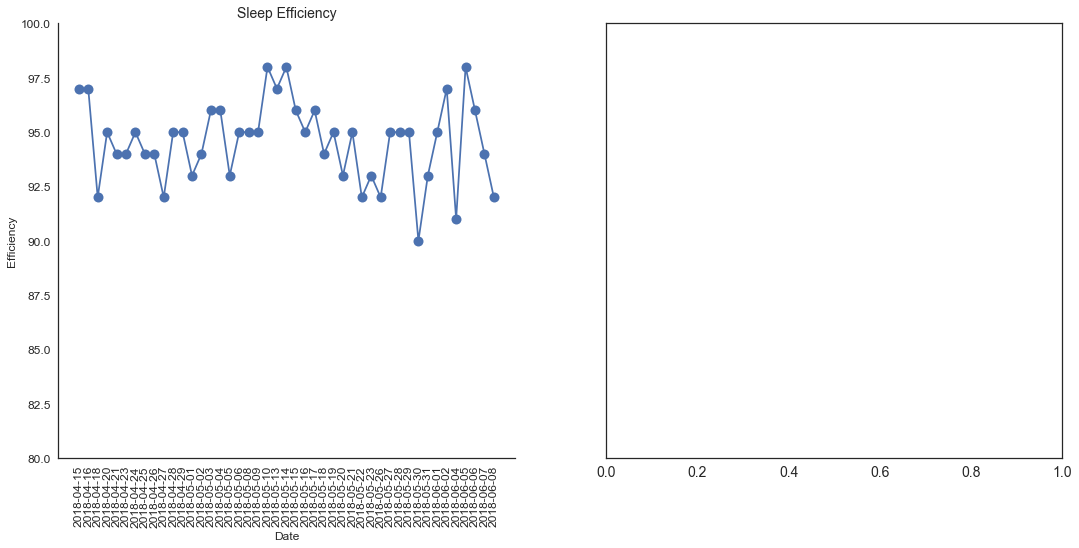

In [71]:
loc = range(len(slsummaryall_df['Date']))
labels = slsummaryall_df['Date']

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,8))

ax1.plot(eff, linestyle='-', marker='o', markersize=10)

ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.set_ylim([np.min(eff)-10, 100])
ax1.tick_params(labelsize=12)

ax1.set_title('Sleep Efficiency', fontsize=14)
ax1.set_xticks(loc)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_xlabel('Date', fontsize=12) 
ax1.set_ylabel('Efficiency', fontsize=12)


'''
ax2.plot(meanDOW_np, linestyle='-', marker='o', markersize=10)

ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
ax2.set_ylim([np.min(meanHR)-10, np.max(meanHR)+10])
ax2.tick_params(labelsize=12)

ax2.set_title('Heart Rate vs. Day of the Week', fontsize=14)

ax2.set_xticks(range(0,7,1))
ax2.set_xticklabels(DOW_df.index, rotation=90) 
ax2.set_xlabel('Day of the Week', fontsize=12)'''

ValueError: `bins` must increase monotonically, when an array

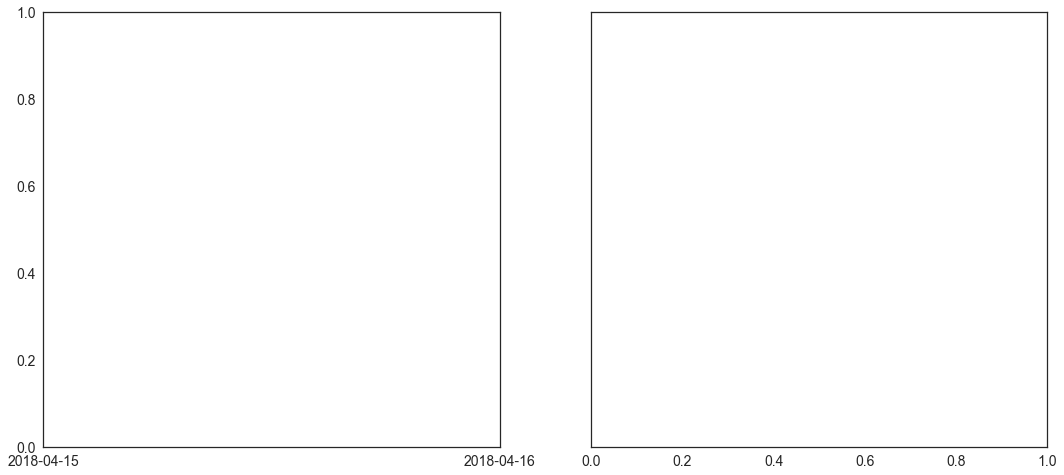

In [77]:
date_series = slsummaryall_df['Date']
loc = range(len(date_series))
labels = date_series

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,8))

ax1.hist(date_series, eff)

#density=True, histtype='stepfilled', facecolor='g', alpha=0.75

ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
#ax1.set_ylim([np.min(eff)-10, 100])
#ax1.tick_params(labelsize=12)

ax1.set_title('Sleep Efficiency', fontsize=14)
#ax1.set_xticks(loc)
#ax1.set_xticklabels(labels, rotation=90)
ax1.set_xlabel('Date', fontsize=12) 
ax1.set_ylabel('Efficiency', fontsize=12)



In [95]:
grouped_DOW = slsummaryall_df.groupby('DOW').median()
grouped_DOW = grouped_DOW.reindex(index = ['Monday','Tuesday','Wednesday', 'Thursday',
                                           'Friday', 'Saturday', 'Sunday'])
grouped_DOW = grouped_DOW.reset_index()
grouped_DOW

,DOW,Duration,Efficiency,MainSleep,Minutes Asleep,Minutes Awake,Sleep_Deep,Sleep_Light,Sleep_REM,Sleep_stage_Wake,Sleep_stage_Wake_Count,Time in Bed,%REM,%Deep,%Restorative
0,Monday,33630000.0,95.0,True,475.0,79.5,68.5,327.5,97.5,79.5,23.5,560.5,20.780164,13.309298,33.986582
1,Tuesday,34680000.0,95.0,True,517.0,80.0,60.0,341.0,87.0,80.0,27.0,578.0,17.827869,12.295082,28.746929
2,Wednesday,35070000.0,94.0,True,507.5,75.5,50.0,380.0,78.0,75.5,25.0,584.5,14.716800,11.153567,24.854628
3,Thursday,32970000.0,95.0,True,474.0,74.5,48.0,324.0,63.0,74.5,23.5,549.5,14.448934,10.186415,27.717981
4,Friday,36330000.0,94.5,True,538.0,75.5,44.0,365.0,90.5,75.5,29.0,605.5,18.059567,8.636929,25.202740
5,Saturday,28950000.0,94.5,True,415.0,73.0,50.5,309.0,51.5,73.0,21.5,482.5,12.614683,12.179129,24.908759
6,Sunday,32460000.0,95.0,True,464.5,69.5,69.0,327.5,61.5,69.5,26.5,541.0,14.611212,14.384280,29.562707


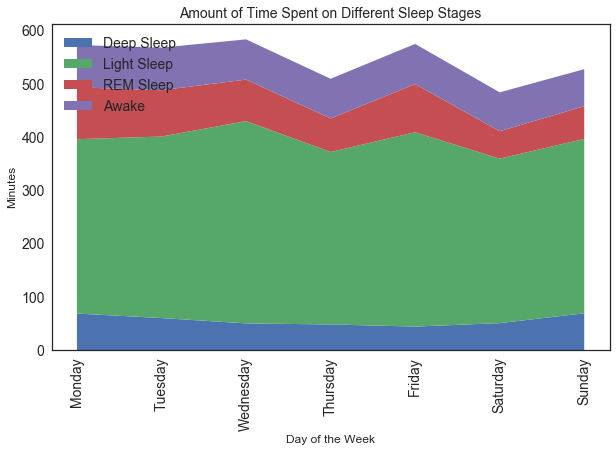

In [100]:
# plot stacked area chart for different sleep stages by day of the week
x = grouped_DOW.index
y_df = grouped_DOW[['Sleep_Deep', 'Sleep_Light', 'Sleep_REM', 'Sleep_stage_Wake']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Sleep Stages', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(weekday_list, rotation=90)

plt.stackplot(x, y, labels=['Deep Sleep', 'Light Sleep', 'REM Sleep', 'Awake'])
plt.legend(loc='upper left')
plt.show()

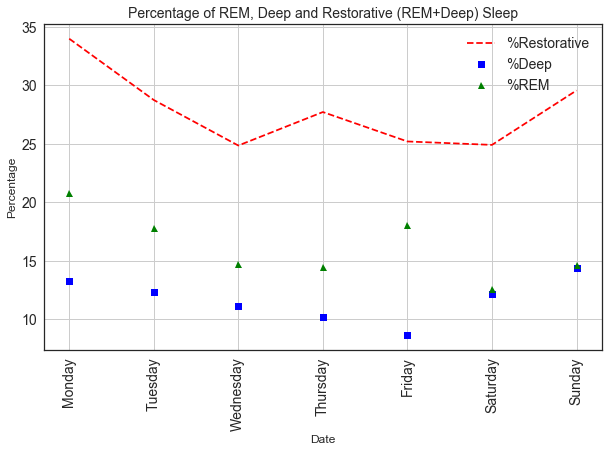

In [97]:


date_series = grouped_DOW.index
perc_REM = grouped_DOW['%REM']
perc_Deep = grouped_DOW['%Deep']
perc_Rest = grouped_DOW['%Restorative']

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(date_series, perc_Rest, 'r--', date_series, perc_Deep, 'bs', date_series, perc_REM, 'g^')
#plt.xticks(rotation=90)

weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(weekday_list, rotation=90)

plt.title('Percentage of REM, Deep and Restorative (REM+Deep) Sleep', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(labels=['%Restorative', '%Deep', '%REM'], loc='upper right')
plt.grid(True)

plt.show()

## Correlation of Sleep Stats

In [7]:
# prepare dataframe to look at correlations

renamed_df = slsummaryall_df.rename(columns = {
    'Sleep_Deep':'Deep Sleep',
    'Sleep_Light': 'Light Sleep',
    'Sleep_REM': 'REM Sleep',
    'Sleep_stage_Wake_Count':'Number of Awakenings'
})

corr_df = renamed_df[['Date', 'Efficiency', 'Minutes Asleep',
                           'Deep Sleep', 'Light Sleep', 'REM Sleep',
                           'Minutes Awake', 'Number of Awakenings',
                           'Time in Bed'
                          ]]

corr_df.corr()

,Efficiency,Minutes Asleep,Deep Sleep,Light Sleep,REM Sleep,Minutes Awake,Number of Awakenings,Time in Bed
Efficiency,1.000000,-0.079371,0.245980,-0.279442,0.265777,-0.295657,-0.049590,-0.138558
Minutes Asleep,-0.079371,1.000000,0.345406,0.846093,0.465066,0.460197,0.627869,0.977963
Deep Sleep,0.245980,0.345406,1.000000,-0.080618,0.391434,0.156152,0.256403,0.337135
Light Sleep,-0.279442,0.846093,-0.080618,1.000000,-0.006416,0.581733,0.604124,0.872684
REM Sleep,0.265777,0.465066,0.391434,-0.006416,1.000000,-0.244255,0.087858,0.347050
Minutes Awake,-0.295657,0.460197,0.156152,0.581733,-0.244255,1.000000,0.523295,0.635411
Number of Awakenings,-0.049590,0.627869,0.256403,0.604124,0.087858,0.523295,1.000000,0.669142
Time in Bed,-0.138558,0.977963,0.337135,0.872684,0.347050,0.635411,0.669142,1.000000


In [8]:
# define heatmap function
def heatmap(df, anchor_val):
    sns.set(style = "white", font_scale=1.4)
    corrd = df.corr()
    mask = np.zeros_like(corrd, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(12, 8))
    cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
    sns.heatmap(corrd, mask=mask, cmap=cmap, vmax=anchor_val,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

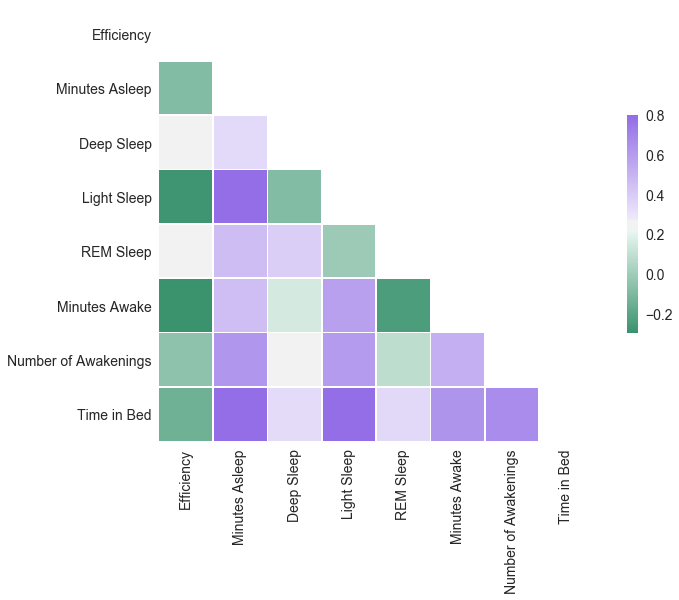

In [9]:
# plot heatmap to look at correlations between stats
heatmap(corr_df, .8)

Interesting...
> Deep sleep is inversely correlated with light sleep and slightly correlated with REM sleep <br>
> Efficiency is positively correlated with deep sleep <br>
> REM sleep also inversely correlated with light sleep but positively correlated with deep sleep! <br>
> Number of awakenings and minutes awake are positively correlated with time in bed

Curious to see what happens with more data.

## Analysis of Average Heart Rate per Sleep Stage

In [10]:
# define function to read files
def read_files_from_path(path):
    dflist = []
    my_dir = os.listdir(path)
    csvs = [d for d in my_dir if d[-4:] == '.csv']
    for c in csvs:
        df = pd.read_csv(path+c, index_col=None, header=0)
        dflist.append(df)
    df_all = pd.concat(dflist)
    return df_all

In [11]:
df = read_files_from_path('/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit/downloads/sleep/')

In [12]:
df = df.rename(columns = {'Time':'Date_Time'})

In [13]:
df = df.reset_index()
df = df.drop(['index'], axis=1)

In [14]:
df.head(50)

,Stage,Date_Time
0,wake,2018-05-29 23:03:00
1,light,2018-05-29 23:10:30
2,deep,2018-05-29 23:40:00
3,light,2018-05-30 00:16:30
4,deep,2018-05-30 00:51:00
5,light,2018-05-30 01:06:30
6,deep,2018-05-30 01:22:00
7,light,2018-05-30 01:41:00
8,rem,2018-05-30 01:44:00
9,wake,2018-05-30 01:49:00


In [15]:
df.dtypes

Stage        object
Date_Time    object
dtype: object

In [16]:
df['Date'], df['Time'] = df['Date_Time'].str.split(' ', 1).str

In [17]:
df['year'], df['month'], df['day'] = df['Date'].str.split('-').str

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['DOW'] = df['Date'].dt.weekday_name

In [19]:
df.head()

,Stage,Date_Time,Date,Time,year,month,day,DOW
0,wake,2018-05-29 23:03:00,2018-05-29,23:03:00,2018,05,29,Tuesday
1,light,2018-05-29 23:10:30,2018-05-29,23:10:30,2018,05,29,Tuesday
2,deep,2018-05-29 23:40:00,2018-05-29,23:40:00,2018,05,29,Tuesday
3,light,2018-05-30 00:16:30,2018-05-30,00:16:30,2018,05,30,Wednesday
4,deep,2018-05-30 00:51:00,2018-05-30,00:51:00,2018,05,30,Wednesday


In [20]:
# define function to read HR files and add date
def read_HRfiles(path):
    dflist = []
    my_dir = os.listdir(path)
    csvs = [d for d in my_dir if d[-4:] == '.csv']
    for c in csvs:
        df = pd.read_csv(path+c, index_col=None, header=0)
        df['Date'] = '{}-{}-{}'.format(c[-12:-8], c[-8:-6], c[-6:-4])
        year, month, day = int(c[-12:-8]), int(c[-8:-6]), int(c[-6:-4])
        df['year'] = year
        df['month'] = month
        df['day'] = day
        df['DOW'] = datetime.date(year, month, day).strftime('%A')
        df['DOW'] = pd.Categorical(df['DOW'],
                                  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                              'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)
        dflist.append(df)
    df_all = pd.concat(dflist)
    return df_all

In [21]:
HR_df = read_HRfiles('/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit/downloads/heart/')

In [22]:
HR_df.head()

,Time,Heart Rate,Date,year,month,day,DOW
0,00:00:01,54,2018-06-07,2018,6,7,Thursday
1,00:00:11,52,2018-06-07,2018,6,7,Thursday
2,00:00:16,51,2018-06-07,2018,6,7,Thursday
3,00:00:31,52,2018-06-07,2018,6,7,Thursday
4,00:00:36,53,2018-06-07,2018,6,7,Thursday


In [23]:
HR_df['Date_Time'] = HR_df[['Date', 'Time']].apply(lambda x: ' '.join(x), axis=1)

In [24]:
HR_df.head()

,Time,Heart Rate,Date,year,month,day,DOW,Date_Time
0,00:00:01,54,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:01
1,00:00:11,52,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:11
2,00:00:16,51,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:16
3,00:00:31,52,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:31
4,00:00:36,53,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:36


In [25]:
slhr_df = pd.merge(df, HR_df, how='inner', on='Date_Time')

In [26]:
slhr_df.head()

,Stage,Date_Time,Date_x,Time_x,year_x,month_x,day_x,DOW_x,Time_y,Heart Rate,Date_y,year_y,month_y,day_y,DOW_y
0,light,2018-05-30 05:06:30,2018-05-30,05:06:30,2018,05,30,Wednesday,05:06:30,54,2018-05-30,2018,5,30,Wednesday
1,deep,2018-05-14 00:34:00,2018-05-14,00:34:00,2018,05,14,Monday,00:34:00,47,2018-05-14,2018,5,14,Monday
2,wake,2018-05-14 02:43:30,2018-05-14,02:43:30,2018,05,14,Monday,02:43:30,69,2018-05-14,2018,5,14,Monday
3,light,2018-05-14 03:53:00,2018-05-14,03:53:00,2018,05,14,Monday,03:53:00,59,2018-05-14,2018,5,14,Monday
4,light,2018-05-28 20:36:30,2018-05-28,20:36:30,2018,05,28,Monday,20:36:30,52,2018-05-28,2018,5,28,Monday


In [27]:
slhr_df = slhr_df.drop(['Time_y','Date_y','year_y', 'month_y', 'day_y', 'DOW_y' ], axis=1)
slhr_df = slhr_df.rename(columns = {'Date_x': 'Date',
                                    'Time_x': 'Time',
                                    'year_x': 'year',
                                    'month_x': 'month',
                                    'day_x': 'day',
                                    'DOW_x': 'DOW',
                                    })

In [28]:
slhr_df.head()

,Stage,Date_Time,Date,Time,year,month,day,DOW,Heart Rate
0,light,2018-05-30 05:06:30,2018-05-30,05:06:30,2018,05,30,Wednesday,54
1,deep,2018-05-14 00:34:00,2018-05-14,00:34:00,2018,05,14,Monday,47
2,wake,2018-05-14 02:43:30,2018-05-14,02:43:30,2018,05,14,Monday,69
3,light,2018-05-14 03:53:00,2018-05-14,03:53:00,2018,05,14,Monday,59
4,light,2018-05-28 20:36:30,2018-05-28,20:36:30,2018,05,28,Monday,52


In [29]:
slhr_df.shape

(384, 9)

In [30]:
slhr_df.dtypes

Stage                 object
Date_Time             object
Date          datetime64[ns]
Time                  object
year                  object
month                 object
day                   object
DOW                   object
Heart Rate             int64
dtype: object

In [31]:
droped_simplified = slhr_df.loc[(slhr_df['Stage'] != 'awake') &\
                                (slhr_df['Stage'] != 'restless') &\
                                (slhr_df['Stage'] != 'asleep') ]

In [32]:
groupedstage_df = slhr_df.groupby(['Stage']).mean()
groupedstage_df

,Heart Rate
Stage,
asleep,52.400000
awake,62.800000
deep,49.137931
light,52.719178
rem,52.836364
restless,52.255814
wake,53.378788


In [33]:
groupedstage2_df = droped_simplified.groupby(['Stage']).mean()
groupedstage2_df

,Heart Rate
Stage,
deep,49.137931
light,52.719178
rem,52.836364
wake,53.378788


/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Sleep Stage')

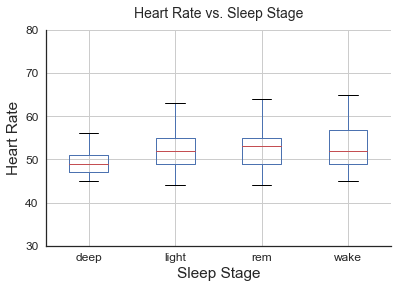

In [34]:
plt.figure(figsize = (16,8))
droped_simplified.boxplot(column = 'Heart Rate', by = 'Stage')

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_ylim([30, 80])
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 

plt.title('')
plt.suptitle('Heart Rate vs. Sleep Stage', fontsize=14)
plt.ylabel('Heart Rate')
plt.xlabel('Sleep Stage')

# NOT SURE WHERE THIS NEXT BIT WAS GOING ANYMORE!! >>

In [35]:
HR_df.head()

,Time,Heart Rate,Date,year,month,day,DOW,Date_Time
0,00:00:01,54,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:01
1,00:00:11,52,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:11
2,00:00:16,51,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:16
3,00:00:31,52,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:31
4,00:00:36,53,2018-06-07,2018,6,7,Thursday,2018-06-07 00:00:36


In [36]:
HR_df.shape

(1216736, 8)

In [37]:
HR_timegrouped_df = HR_df.groupby('Time').mean()

In [38]:
HR_timegrouped_df = HR_timegrouped_df.reset_index()

In [39]:
HR_timegrouped_df.head()

,Time,Heart Rate,year,month,day
0,00:00:00,51.666667,2018.0,4.600000,16.200000
1,00:00:01,49.416667,2018.0,4.750000,12.250000
2,00:00:02,51.090909,2018.0,4.454545,19.818182
3,00:00:03,51.769231,2018.0,4.307692,18.692308
4,00:00:04,51.083333,2018.0,4.416667,17.916667


In [40]:
HR_timegrouped_df.shape

(86340, 5)

In [41]:
sampled_HR_timegrouped_df = HR_timegrouped_df[HR_timegrouped_df.index % 10 == 0]

In [42]:
sampled_HR_timegrouped_df = sampled_HR_timegrouped_df.drop(['year', 'month', 'day'], axis=1)

In [43]:
sampled_HR_timegrouped_df.head(10)

,Time,Heart Rate
0,00:00:00,51.666667
10,00:00:10,50.571429
20,00:00:20,51.294118
30,00:00:30,50.944444
40,00:00:40,53.000000
50,00:00:50,51.473684
60,00:01:00,52.818182
70,00:01:10,51.944444
80,00:01:20,49.133333
90,00:01:30,50.785714


In [44]:
sampled_HR_timegrouped_df.shape

(8634, 2)

In [45]:
sampled_HR_timegrouped_df['Time'] = pd.to_datetime(sampled_HR_timegrouped_df['Time'], format='%H:%M:%S').dt.time

In [46]:
sampled_HR_timegrouped_df.dtypes

Time           object
Heart Rate    float64
dtype: object

In [47]:
sampled_HR_timegrouped_df.head()

,Time,Heart Rate
0,00:00:00,51.666667
10,00:00:10,50.571429
20,00:00:20,51.294118
30,00:00:30,50.944444
40,00:00:40,53.000000


In [ ]:
'''fig, ax = plt.subplots()
ax.plot(HR_timegrouped_df.index, HR_timegrouped_df['Heart Rate'])
ax.set(xlabel = 'Time of Day (hh:mm:ss)',
       ylabel = 'Heart Rate (bpm)',
       title = 'Mean Heart Rate vs. Time of Day')
ax.grid(False)
plt.show()'''

In [ ]:
# plot chart
x = HR_timegrouped_df.index

y = HR_timegrouped_df['Heart Rate']

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Mean Heart Rate vs. Time of Day', fontsize=14)
plt.xlabel('Time of Day (hh:mm:ss)', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)

#weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#ax.set_xticks(range(0,7,1))
#ax.set_xticklabels(weekday_list, rotation=90)

plt.plot(x, y)

plt.show()

## Plotting Hypnogram

In [49]:
sl20180514_df = pd.read_csv('./downloads/sleep/sleepstagesdatetime20180514_0.csv',
                            index_col=None, header=0)
sl20180514_df.head()

,Stage,Time
0,wake,2018-05-13 23:02:30
1,light,2018-05-13 23:03:00
2,deep,2018-05-13 23:47:00
3,light,2018-05-13 23:52:30
4,rem,2018-05-14 00:02:30


In [50]:
sl20180514_df.dtypes

Stage    object
Time     object
dtype: object

In [51]:
sl20180514_df['Time'] = pd.to_datetime(sl20180514_df['Time']).apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [52]:
sl20180514_df['Time'] = pd.to_datetime(sl20180514_df['Time'], format='%Y-%m-%d %H:%M:%S')

In [53]:
sl20180514_df.head()

,Stage,Time
0,wake,2018-05-13 23:02:30
1,light,2018-05-13 23:03:00
2,deep,2018-05-13 23:47:00
3,light,2018-05-13 23:52:30
4,rem,2018-05-14 00:02:30


In [54]:
sl20180514_df.dtypes

Stage            object
Time     datetime64[ns]
dtype: object

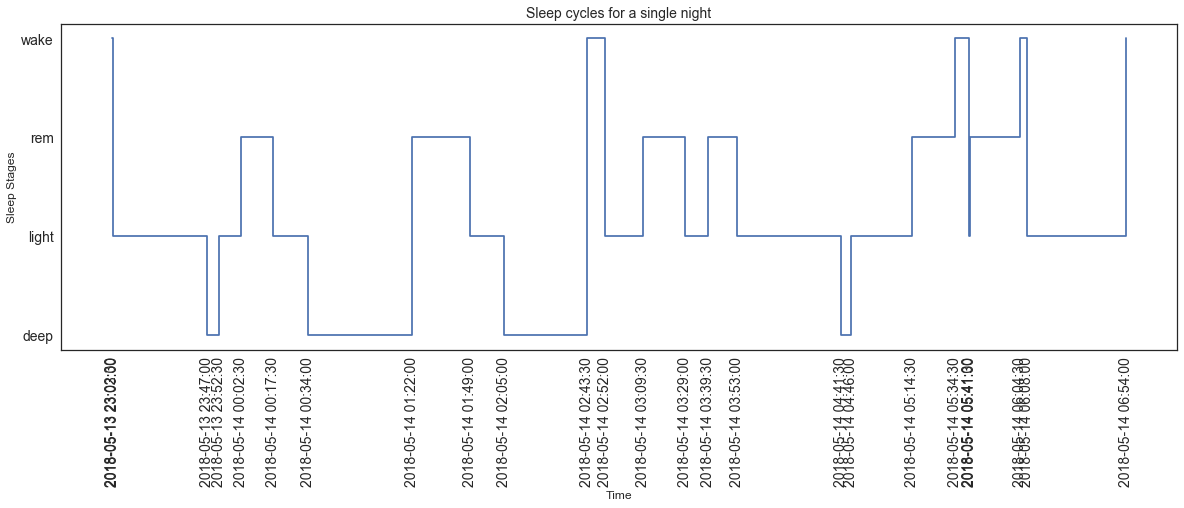

In [55]:
x = sl20180514_df['Time']
y = sl20180514_df['Stage']

fig, ax = plt.subplots(figsize=(20, 6))

plt.title('Sleep cycles for a single night', fontsize=14)

plt.xlabel('Time', fontsize=12)
plt.ylabel('Sleep Stages', fontsize=12)

plt.step(x, y, where='post')

xticks = sl20180514_df['Time'].values
plt.xticks(xticks, rotation=90)
time_labels = sl20180514_df['Time']
ax.set_xticklabels(time_labels, rotation=90)

plt.show()